In [1]:
# Importing pandas and matplotlib
import pandas as pd
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

In [2]:
# add dataframe column 'day' to represent the number of days since start of treatment
# return final day of treatment for filesaving
def add_days_column(dframe):
    start_date = datetime.strptime(dframe.loc[0,'date'], "%m/%d/%y") # datetime object for start of treatment
    final_date = datetime.strptime(dframe.iloc[-1,0], "%m/%d/%y").strftime('%d%b%Y') # datetime object for start of treatment
    for i in measurements_df.index:
        timedelta = int((datetime.strptime(dframe.loc[i,'date'], "%m/%d/%y") - start_date).days)
        dframe.loc[i, 'day'] = timedelta

    return final_date

In [3]:
# define a function that generates boxplot to compare `Test` vs `Control` group
def boxplot_by_group(dframe, outliers=True): # input dframe(DataFrame), outlier(boolean)
    
    if outliers == True:
        test_df, control_df = dframe[dframe['type'] == 'Test'], dframe[dframe['type'] == 'Control']
    else:
        x = int(input('Enter maximum value (area_mm^2): '))
        test_df = dframe[(dframe['type'] == 'Test') & (dframe['area_mm^2'] <= x)]
        control_df = dframe[(dframe['type'] == 'Control') & (dframe['area_mm^2'] <= x)]
    
    dates = list(dframe['date'].unique())
    days = [int(i) for i in list(dframe['day'].unique())]
    tests = []
    controls = []
    
    for i in dates:
        tests.append(list(test_df[test_df['date'] == i]['area_mm^2']))
        controls.append(list(control_df[control_df['date'] == i]['area_mm^2']))
    
    fig, ax = plt.subplots()
    ax.boxplot(tests, labels=days)
    ax.boxplot(controls, labels=days, patch_artist=True)
    fig.legend(['Control']).get_frame().set_facecolor('C0')
    
    if outliers == True:
        ax.set(xlabel='Days from Start of Treatment', ylabel='Area (mm^2)', title='Test vs Control (blue) with Outliers')
    else:
        ax.set(xlabel='Days from Start of Treatment', ylabel='Area (mm^2)', title='Test vs Control (blue) w/o Outliers')
    
    if outliers == True:
        fig.savefig('{} figure with outliers.png'.format(last_day), dpi=500)
    else:
        fig.savefig('{} without outliers > {}'.format(last_day, x), dpi=500)
    
    return None

Enter filepath for .csv file:  measurements.csv
Enter maximum value (area_mm^2):  500


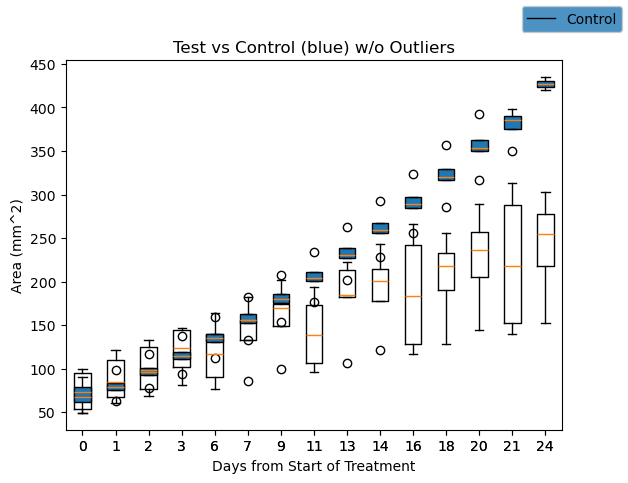

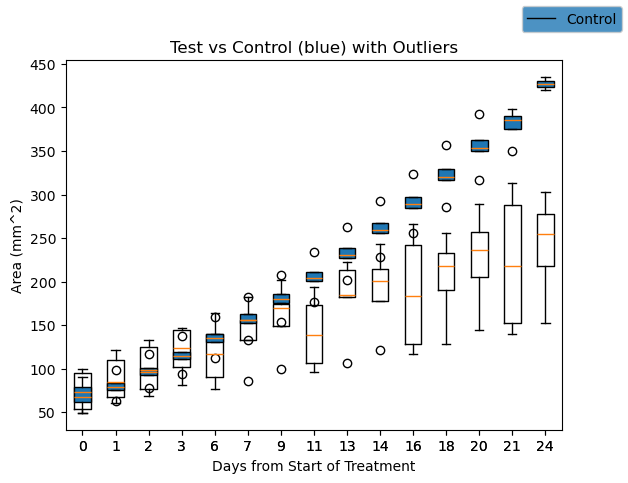

In [4]:
# Read in the data collection CSV as a DataFrame
unfiltered_measurements_df = pd.read_csv(input('Enter filepath for .csv file: '))
measurements_df = unfiltered_measurements_df[pd.isna(unfiltered_measurements_df['date']) == False] # remove last NaN row
# test/run functions
last_day = add_days_column(measurements_df); 
boxplot_by_group(measurements_df, outliers=False);
boxplot_by_group(measurements_df);